<a href="https://colab.research.google.com/github/ashraf-badalov/ml-projects/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("heart.csv")
data.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


In [3]:
data.shape

(303, 14)

In [4]:
data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
categorical_data = ['cp', 'sex', 'thall', 'restecg', 'caa', 'fbs', 'exng', 'slp']

for cdata in categorical_data:
  if data[cdata].nunique()>2:
    print(cdata)

cp
thall
restecg
caa
slp


In [8]:
data_encoded = pd.get_dummies(data, columns=['cp', 'caa', 'thall','restecg','slp'])
data_encoded.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_0,...,thall_0,thall_1,thall_2,thall_3,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2
0,63,1,145,233,1,150,0,2.3,1,0,...,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,1,0,0,1,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,0,1,0,1,0,0,0,0,1
3,56,1,120,236,0,178,0,0.8,1,0,...,0,0,1,0,0,1,0,0,0,1
4,57,0,120,354,0,163,1,0.6,1,1,...,0,0,1,0,0,1,0,0,0,1


In [9]:
X = data_encoded.drop('output', axis=1)
y = data_encoded['output']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(f'the accuracy of model before tuning hyperparameters: {acc}')

the accuracy of model before tuning hyperparameters: 0.7049180327868853


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(estimator = svm_classifier,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose = 4
)

In [13]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.837 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.837 total time=   0.1s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.729 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.917 total time=   0.1s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.771 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.837 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=4)

In [14]:
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}


In [15]:
print(grid_search.best_score_)

0.8302721088435374


In [16]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res = cv_res.sort_values(by='mean_test_score', ascending=False)
cv_res.to_csv('cv_results.csv')

In [17]:
svm = SVC(C=10, gamma = 0.01, kernel = 'linear')
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print(f'the accuracy of model after tuning parameters: {accuracy}')

the accuracy of model after tuning parameters: 0.8360655737704918


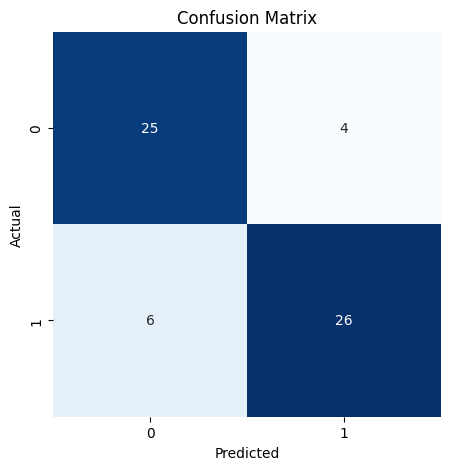

In [32]:
import seaborn as sns

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()